### 4.	Lakukan balancing data masing-masing (bebas motoda apapun) secara oversampling atau undersampling (pilih salah satu), selanjutnya lakukan seleksi fitur dan visualisasikan hasilnya (materi 7)
---

In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier

In [72]:
dataset = "test.csv"
df = pd.read_csv(dataset)
df.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


### Oversampling

In [73]:
print("Sebelum Oversampling:")
print(df['wifi'].value_counts())

Sebelum Oversampling:
wifi
1    507
0    493
Name: count, dtype: int64


In [74]:
X = df.drop('wifi', axis=1)
y = df['wifi']

#Membuat object RandomOverSampler
ros = RandomOverSampler( random_state=42)

#Oversampling
X_res, y_res = ros.fit_resample(X, y)

print("After Oversampling:")
print(pd.Series(y_res).value_counts())

After Oversampling:
wifi
0    507
1    507
Name: count, dtype: int64


In [75]:
#Membuat dataframe baru setelah oversampling
df_resampled = pd.concat([X_res, y_res], axis=1)

print("Oversampled Dataset:")
print(df_resampled.head())

Oversampled Dataset:
   id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory   
0   1           1043     1          1.8         1  14       0           5  \
1   2            841     1          0.5         1   4       1          61   
2   3           1807     1          2.8         0   1       0          27   
3   4           1546     0          0.5         1  18       1          25   
4   5           1434     0          1.4         0  11       1          49   

   m_dep  mobile_wt  ...  pc  px_height  px_width   ram  sc_h  sc_w   
0    0.1        193  ...  16        226      1412  3476    12     7  \
1    0.8        191  ...  12        746       857  3895     6     0   
2    0.9        186  ...   4       1270      1366  2396    17    10   
3    0.5         96  ...  20        295      1752  3893    10     0   
4    0.5        108  ...  18        749       810  1773    15     8   

   talk_time  three_g  touch_screen  wifi  
0          2        0             1     0  
1

### Seleksi Unvariate

In [76]:
df_resampled.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [77]:
# memilih data yang dibutuhkan
X = df_resampled.iloc[:,0:21]  #independent colums
y = df_resampled.iloc[:,-1]    # target colum i.e price range

In [78]:
# menerapkan SelectKBest untuk melakukan ekstraksi
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
df_resampledscores = pd.DataFrame(fit.scores_)
df_resampledcolumns = pd.DataFrame(X.columns)

In [79]:
# menggabungkan 2 dataframe
featureScores = pd.concat([df_resampledcolumns,df_resampledscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(5,'Score')) 

        Specs       Score
13   px_width  952.670709
20       wifi  507.000000
14        ram  493.783470
0          id  208.793960
12  px_height  101.983933


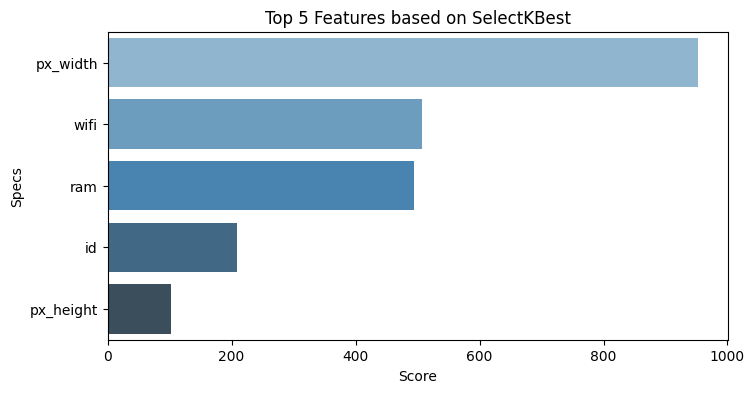

In [80]:
top_features = featureScores.nlargest(5,'Score')
plt.figure(figsize=(8, 4))
sns.barplot(x='Score', y='Specs', data=top_features, palette='Blues_d')
plt.title('Top 5 Features based on SelectKBest')
plt.show()

### Feature Importance

In [81]:
X = df_resampled.iloc[:,0:21]  
y = df_resampled.iloc[:,-1]    
df_resampled.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [82]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.00588938 0.00673331 0.00432209 0.00637593 0.00391789 0.0064972
 0.00328105 0.0060361  0.00701481 0.00755765 0.0052997  0.00684197
 0.00706893 0.00763465 0.00653647 0.00649018 0.00637648 0.00625811
 0.00256679 0.00365554 0.88364577]


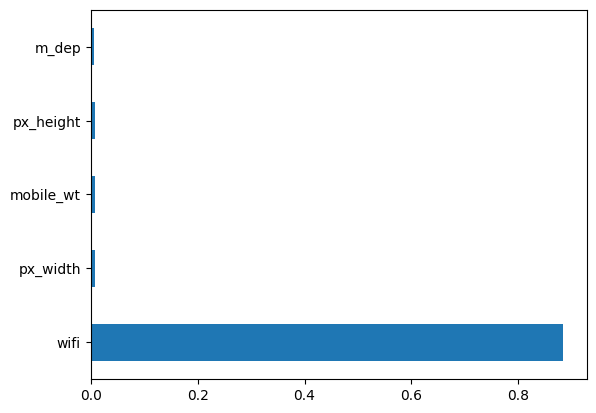

In [83]:
# melakukan plot
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

### Matriks Korelasi dengan Heatmap
---

In [84]:
import seaborn as sns

In [85]:
X = df_resampled.iloc[:,0:21] 
y = df_resampled.iloc[:,-1]   

In [86]:
#Mendapatkan  correlations dari setiap fitur dalam dataset
corrmat = df_resampled.corr()
top_corr_features = corrmat.index

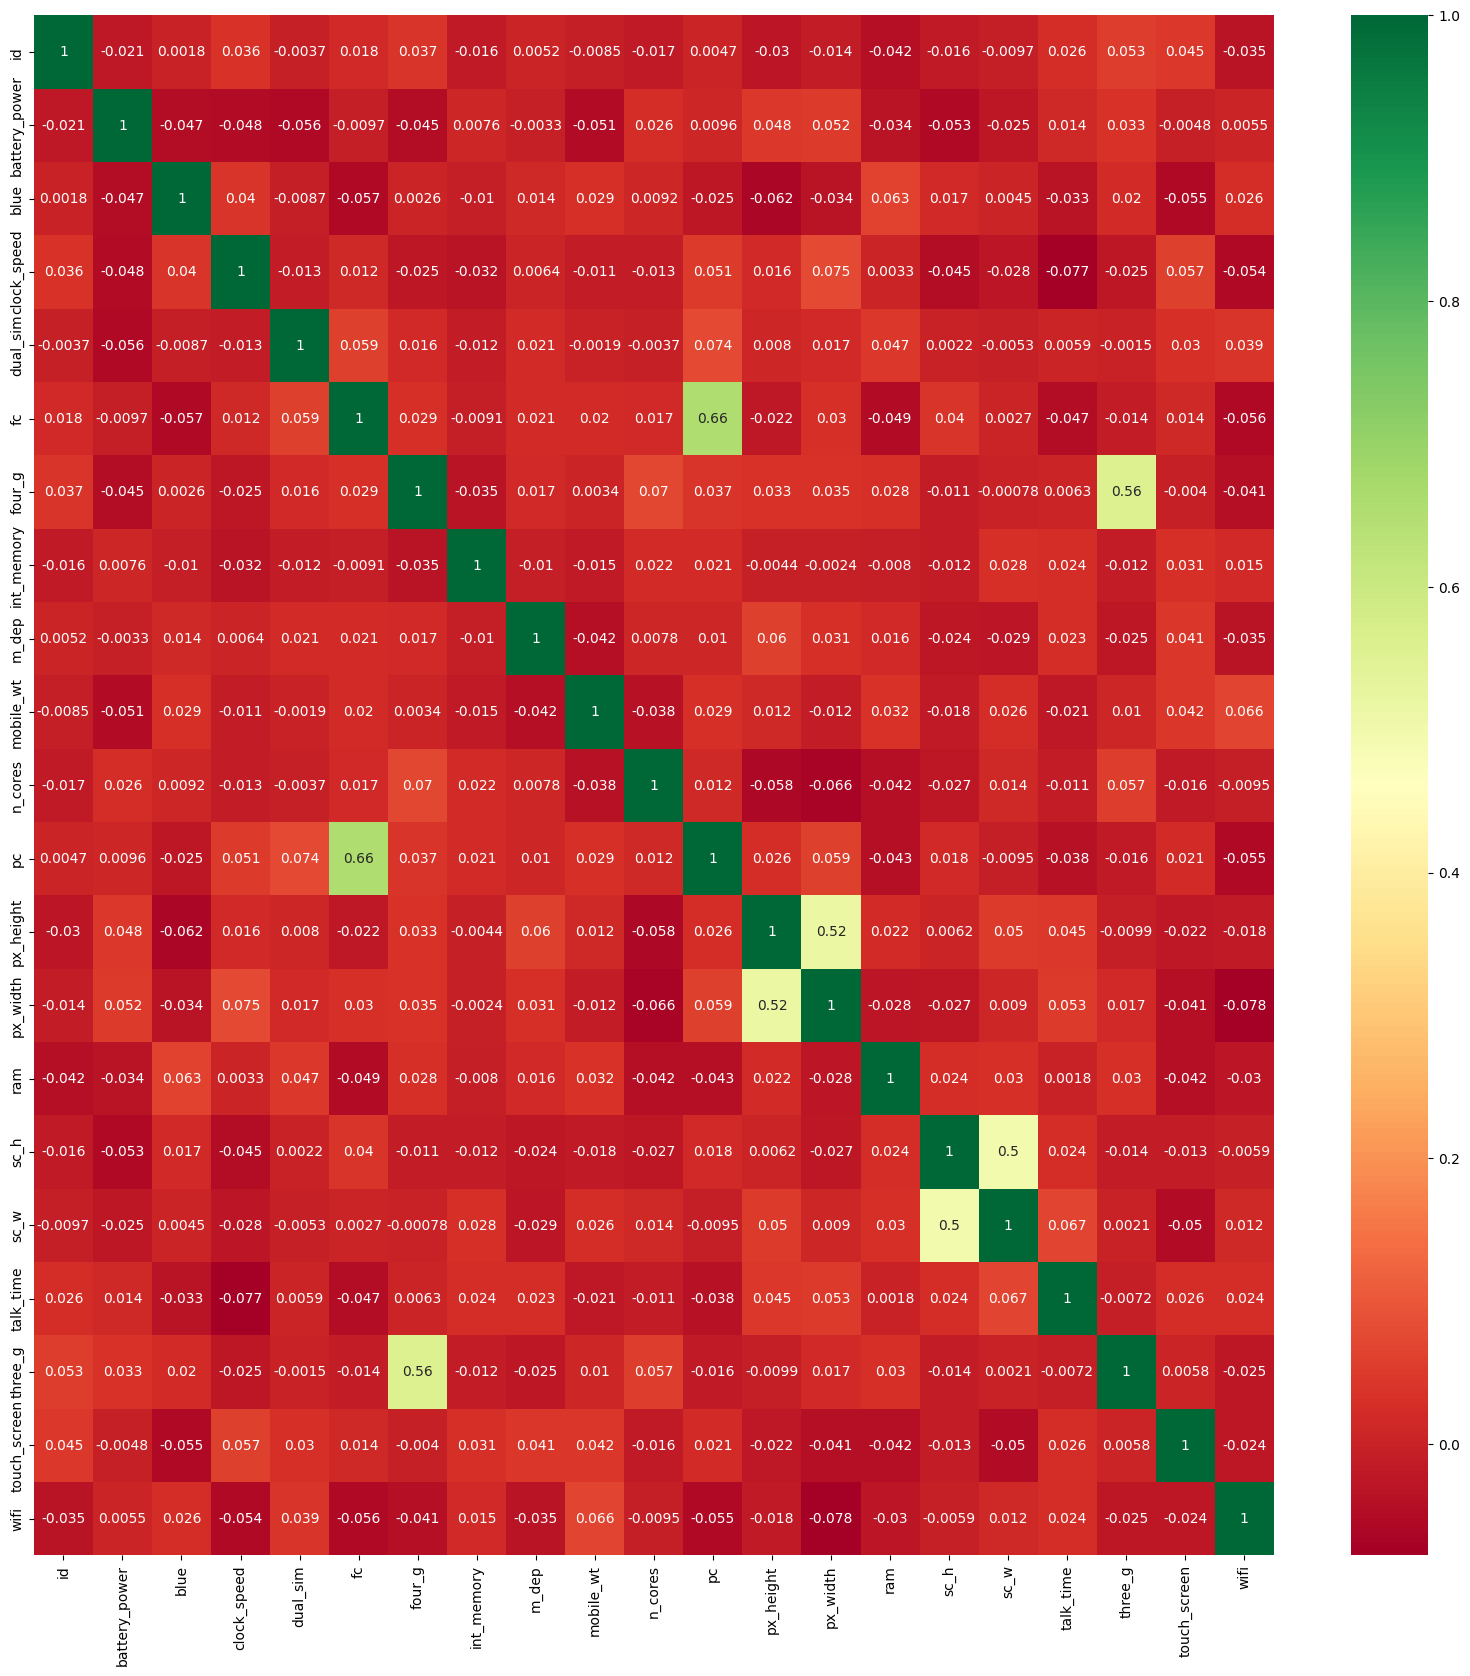

In [87]:
#Plot heatmap 
plt.figure(figsize=(20,20))
g=sns.heatmap(df_resampled[top_corr_features].corr(),annot=True,cmap="RdYlGn")